Technological Institute of the Philippines | Quezon City - Computer Engineering
--- | ---
Course Code: | CPE 019
Code Title: | Emerging Technologies in CpE 2  | AY 2023-2024
<hr> | <hr>
<u>**FINAL EXAM** | **Model Deployment in the Cloud**
**Name** | Paul Gabriel Pagatpat & Katherine May Dalangan
**Section** | CPE32S5
**Date Performed**: | May 11, 2024
**Date Submitted**: | May 18, 2024
**Instructor**: | Engr. Roman M. Richard

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report
import keras
from keras.models import load_model
from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing import image

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [12]:
from keras.models import load_model

loaded_model = load_model('/content/drive/MyDrive/CPE019-FinalProject/model.h5')
test_data_path = ('/content/drive/MyDrive/CPE019-FinalProject/images')
test_datagen = ImageDataGenerator(rescale=1.0 / 255)


In [13]:
test_generator = test_datagen.flow_from_directory(
    test_data_path,
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical',
    shuffle=False
)

test_loss, test_accuracy = loaded_model.evaluate(test_generator)

Found 1125 images belonging to 4 classes.
36/36 [==============================] - 258s 7s/step - loss: 0.0421 - accuracy: 0.9876


# **Display DataFrame**

In [17]:
test_accuracy_percentage = test_accuracy * 100
evaluation_result = pd.DataFrame({'Set': ['Test'],'Loss': [test_loss],'Accuracy': [f'{test_accuracy_percentage:.2f}%']
})
evaluation_result

,Set,Loss,Accuracy
0,Test,0.042093,98.76%


# **Confusion Matrix**

In [18]:
class_names = ['cloudy', 'shiny', 'sunrise', 'rain']

predictions = loaded_model.predict(test_generator)
predicted_labels = np.argmax(predictions, axis=1)
true_labels = test_generator.classes
cm = confusion_matrix(true_labels, predicted_labels)


36/36 [==============================] - 121s 3s/step


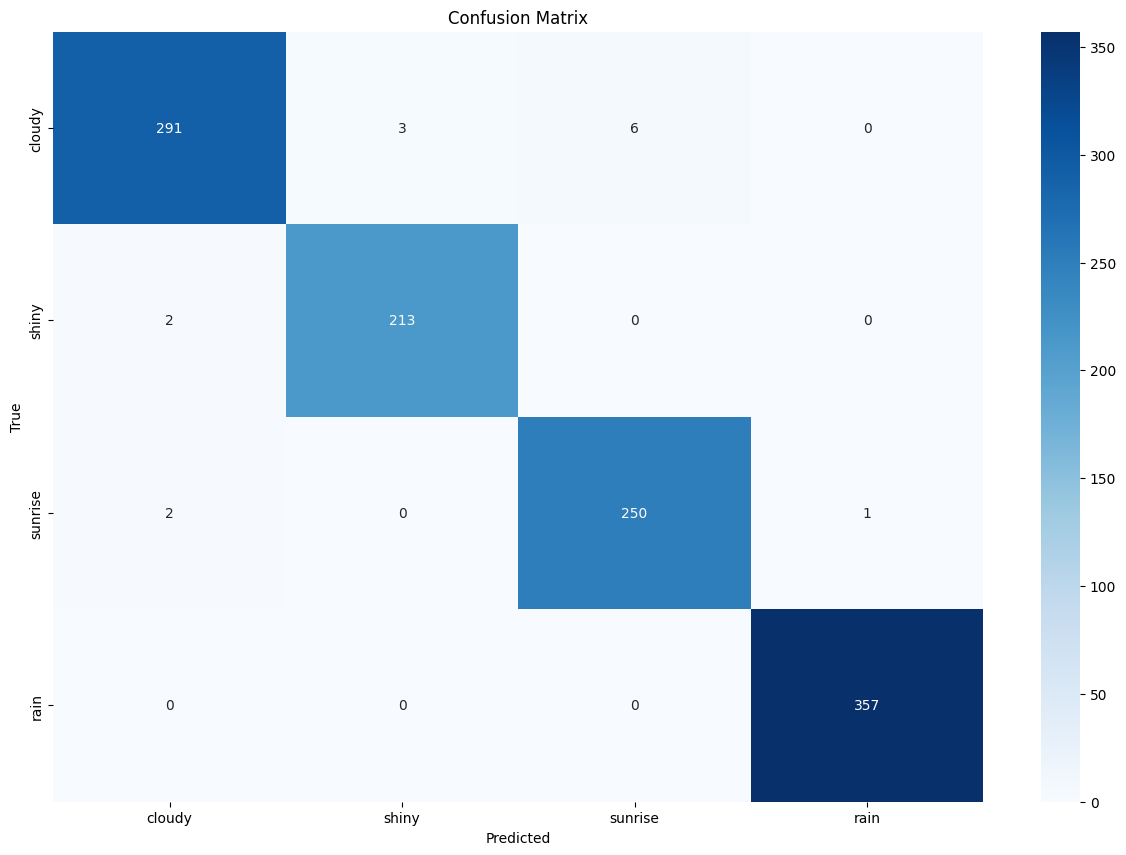

In [19]:

plt.figure(figsize=(15, 10))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()



In [20]:
class_report = classification_report(true_labels, predicted_labels, target_names=class_names)
print(class_report)

              precision    recall  f1-score   support

      cloudy       0.99      0.97      0.98       300
       shiny       0.99      0.99      0.99       215
     sunrise       0.98      0.99      0.98       253
        rain       1.00      1.00      1.00       357

    accuracy                           0.99      1125
   macro avg       0.99      0.99      0.99      1125
weighted avg       0.99      0.99      0.99      1125



In [21]:
print(f"Overall Accuracy: {test_accuracy_percentage:.2f}%")

Overall Accuracy: 98.76%


# **Predictiom**

In [39]:
loaded_model = keras.models.load_model('/content/drive/MyDrive/CPE019-FinalProject/model.h5')
image_paths = [
    '/content/drive/MyDrive/CPE019-FinalProject/images/rain/rain28.jpg',
    '/content/drive/MyDrive/CPE019-FinalProject/images/cloudy/cloudy206.jpg',
    '/content/drive/MyDrive/CPE019-FinalProject/images/sunrise/sunrise250.jpg',
    '/content/drive/MyDrive/CPE019-FinalProject/images/shine/shine165.jpg',
    '/content/drive/MyDrive/CPE019-FinalProject/images/rain/rain10.jpg',
    '/content/drive/MyDrive/CPE019-FinalProject/images/cloudy/cloudy66.jpg',
    '/content/drive/MyDrive/CPE019-FinalProject/images/sunrise/sunrise47.jpg',
    '/content/drive/MyDrive/CPE019-FinalProject/images/shine/shine103.jpg',
]

In [40]:
    correct_predictions = 0

1/1 [==============================] - 2s 2s/step
Real Class: rain
Predicted Class: rain
"Correct"



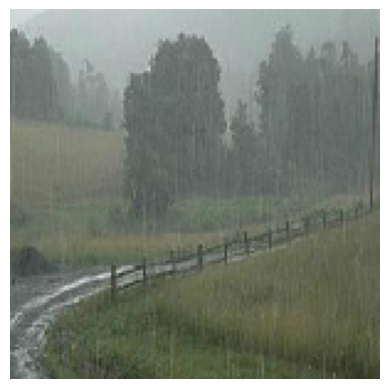

1/1 [==============================] - 0s 174ms/step
Real Class: cloudy
Predicted Class: cloudy
"Correct"



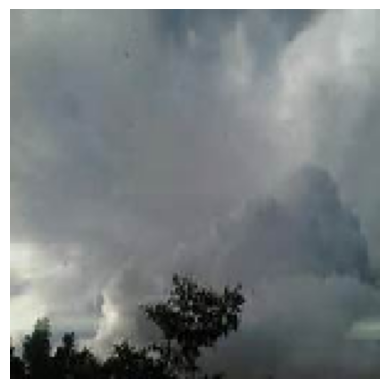

1/1 [==============================] - 0s 176ms/step
Real Class: sunrise
Predicted Class: sunrise
"Correct"



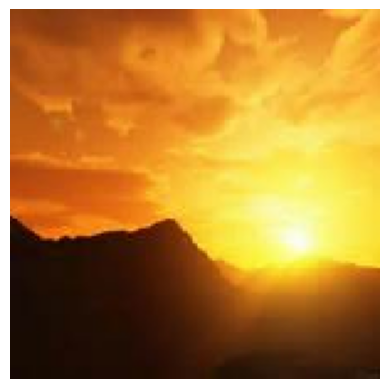

1/1 [==============================] - 0s 159ms/step
Real Class: shine
Predicted Class: shine
"Correct"



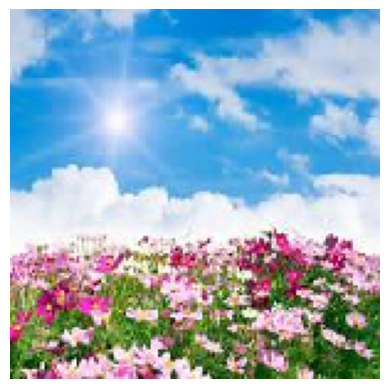

1/1 [==============================] - 0s 185ms/step
Real Class: rain
Predicted Class: rain
"Correct"



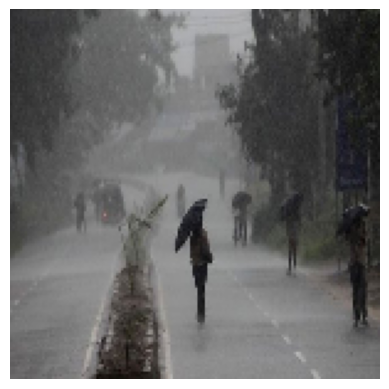

1/1 [==============================] - 0s 171ms/step
Real Class: cloudy
Predicted Class: cloudy
"Correct"



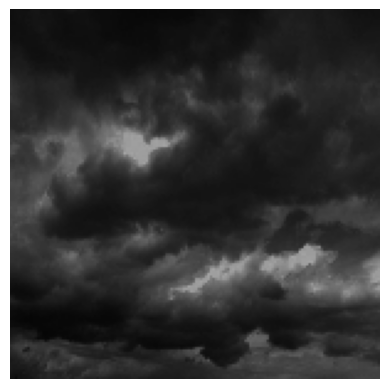

1/1 [==============================] - 0s 155ms/step
Real Class: sunrise
Predicted Class: sunrise
"Correct"



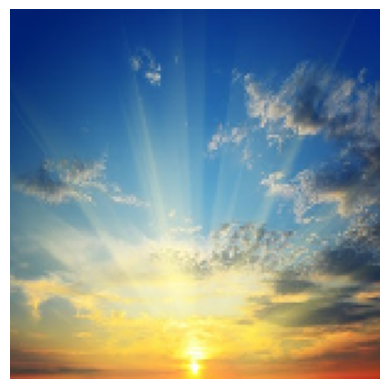

1/1 [==============================] - 0s 165ms/step
Real Class: shine
Predicted Class: shine
"Correct"



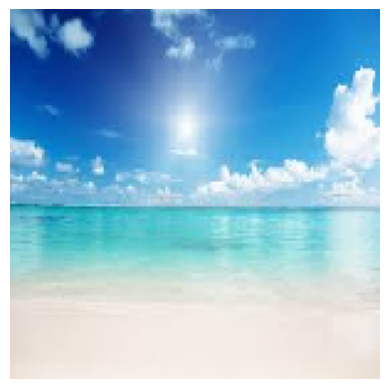


 8 out of 8 images are classified correctly.


In [41]:
for image_path in image_paths:

    real_class = image_path.split('/')[-2]

    img = image.load_img(image_path, target_size=(150, 150))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array /= 255.0

    predictions = loaded_model.predict(img_array)
    predicted_label_index = np.argmax(predictions)

    class_labels = {0: 'cloudy', 1: 'rain', 2: 'shine', 3: 'sunrise'}
    predicted_label = class_labels.get(predicted_label_index, 'Unknown')

    correctness = '"Correct"' if real_class == predicted_label.lower() else '"Incorrect"'

    print(f'Real Class: {real_class}')
    print(f'Predicted Class: {predicted_label}')
    print(correctness)
    print()

    if correctness == '"Correct"':
        correct_predictions += 1

    plt.imshow(img)
    plt.axis('off')
    plt.show()
print(f'\n {correct_predictions} out of {len(image_paths)} images are classified correctly.')